In [2]:
import numpy as np
import scipy as sp

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
class GMM(object):
    def __init__(self, X, k=2):
        # dimension
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        # number of mixtures
        self.k = k
        
    def _init(self):
        # init mixture means/sigmas
        self.mean_arr = np.asmatrix(np.random.random((self.k, self.n)))
        self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
        #print(self.mean_arr)
        #print(self.sigma_arr)
    
    def fit(self, tol=1e-4):
        self._init()
        num_iters = 0
        ll = 1
        previous_ll = 0
        while(ll-previous_ll > tol):
            previous_ll = self.loglikelihood()
            self._fit()
            num_iters += 1
            ll = self.loglikelihood()
            print('Iteration %d: log-likelihood is %.6f'%(num_iters, ll))
        print('Terminate at %d-th iteration:log-likelihood is %.6f'%(num_iters, ll))
    
    def loglikelihood(self):
        ll = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += sp.stats.multivariate_normal.pdf(self.data[i, :], 
                                                        self.mean_arr[j, :].A1, 
                                                        self.sigma_arr[j, :]) *\
                       self.phi[j]
            ll += np.log(tmp) 
        return ll
    
    def _fit(self):
        self.e_step()
        self.m_step()
        
    def e_step(self):
        # calculate w_j^{(i)}
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                num = sp.stats.multivariate_normal.pdf(self.data[i, :], 
                                                       self.mean_arr[j].A1, 
                                                       self.sigma_arr[j]) *\
                      self.phi[j]
                den += num
                self.w[i, j] = num
            self.w[i, :] /= den
            assert self.w[i, :].sum() - 1 < 1e-4
            
    def m_step(self):
        for j in range(self.k):
            const = self.w[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.w[i, j])
                _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
                #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const
        #print(self.sigma_arr)

In [20]:
def normalize_data(X):
    
    X_norm = np.zeros(X.shape)
    X_norm[:,0] = (X[:,0] - np.amin(X[:,0]))/(np.amax(X[:,0]) - np.amin(X[:,0]))
    X_norm[:,1] = (X[:,1] - np.amin(X[:,1]))/(np.amax(X[:,1]) - np.amin(X[:,1]))

    return X_norm

In [43]:
np.loadtxt('data/Faithful.txt')

(272, 2)

In [21]:
#X = np.random.multivariate_normal([0, 3], [[0.5, 0], [0, 0.8]], 20)
#X = np.vstack((X, np.random.multivariate_normal([20, 10], np.identity(2), 50)))
X = np.loadtxt('data/Faithful.txt')
X = normalize_data(X)
X.shape

(272, 2)

In [22]:
gmm = GMM(X)
gmm.fit()

Iteration 1: log-likelihood is 23.853017
Iteration 2: log-likelihood is 129.969848
Iteration 3: log-likelihood is 130.791615
Iteration 4: log-likelihood is 131.165071
Iteration 5: log-likelihood is 131.416280
Iteration 6: log-likelihood is 131.670635
Iteration 7: log-likelihood is 132.012542
Iteration 8: log-likelihood is 132.555412
Iteration 9: log-likelihood is 133.534060
Iteration 10: log-likelihood is 135.555829
Iteration 11: log-likelihood is 140.481602
Iteration 12: log-likelihood is 154.375061
Iteration 13: log-likelihood is 185.773989
Iteration 14: log-likelihood is 209.182169
Iteration 15: log-likelihood is 219.171828
Iteration 16: log-likelihood is 225.867364
Iteration 17: log-likelihood is 232.839856
Iteration 18: log-likelihood is 242.309736
Iteration 19: log-likelihood is 255.164158
Iteration 20: log-likelihood is 269.201371
Iteration 21: log-likelihood is 280.796583
Iteration 22: log-likelihood is 289.020760
Iteration 23: log-likelihood is 290.358276
Iteration 24: log-lik

In [23]:
gmm.mean_arr

matrix([[0.12468479, 0.21657736],
        [0.76847695, 0.69751328]])

In [24]:
gmm.sigma_arr

array([[[0.00564688, 0.00234629],
        [0.00234629, 0.01199635]],

       [[0.01387421, 0.00507003],
        [0.00507003, 0.01283192]]])

In [25]:
gmm.phi

array([0.35587627, 0.64412373])

In [33]:
pd.read_csv('data/Faithful.txt')

,3.600000000000000089e+00 7.900000000000000000e+01
0,1.800000000000000044e+00 5.400000000000000000e+01
1,3.333000000000000185e+00 7.400000000000000000e+01
2,2.282999999999999918e+00 6.200000000000000000e+01
3,4.533000000000000362e+00 8.500000000000000000e+01
4,2.883000000000000007e+00 5.500000000000000000e+01
...,...
266,4.116999999999999993e+00 8.100000000000000000e+01
267,2.149999999999999911e+00 4.600000000000000000e+01
268,4.416999999999999815e+00 9.000000000000000000e+01
269,1.816999999999999948e+00 4.600000000000000000e+01


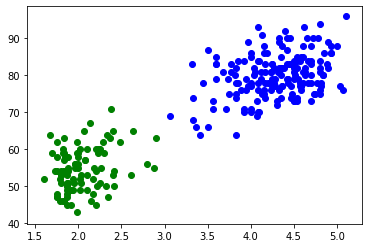

Covariance: [[[ 0.16982046  0.93871793]
  [ 0.93871793 36.02497019]]

 [[ 0.06927449  0.43627723]
  [ 0.43627723 33.70493352]]]
Means: [[ 4.28977944 79.96953298]
 [ 2.03652149 54.47986018]]


In [60]:
import pandas as pd
data = pd.read_csv('data/Faithful.txt',names = (['height','weight']),delimiter=' ')

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,max_iter=200)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green']
for k in range(0,2):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

print ("Covariance: {}".format(gmm.covariances_))
print ("Means: {}".format(gmm.means_))